<div class="alert alert-block alert-success"><font color="black"><h1><left>Experimenting with Skilean module image processing</left></h1></font>

reference: https://towardsdatascience.com/computer-vision-101-working-with-color-images-in-python-7b57381a8a54
           https://www.youtube.com/watch?v=WuVyG4pg9xQ 
    
   
<br><br>Using the image processing in the Scikit Image libraries

<br><br>Types of Images:

a) grayscale:&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;image is stored as a string in integers. Each integer represents intensity of contrast <br> &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(grayness) between white (low itensity)  and black (0 - 255). 0 - all black (weak intensity) -> 255 - all white (high intensity).
    
b) colorspace: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Each pixel is stored as an array of 3 integers. The intensity, plus two more integers to caotyre the RBG scale<br> &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(grayness) between white (low itensity)  

</div>

In [11]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [ ]:
# %matplotlib notebook

In [2]:
def print_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
        
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

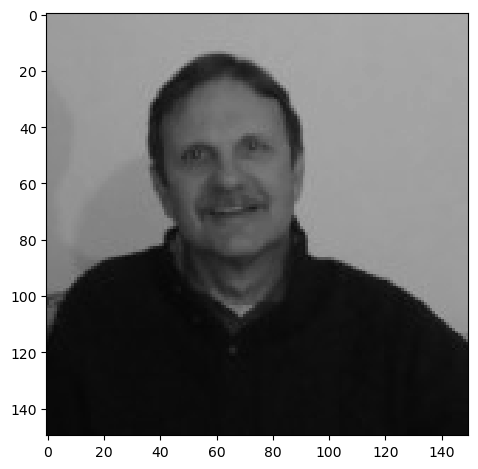

In [36]:
im = imread('E:\\rolan\\Pictures\\rad_picture2.jpg', as_gray=True)
plt.figure()
imshow(im)
plt.show()

In [38]:
im[1:10]

array([[0.61282745, 0.61674902, 0.61674902, ..., 0.66124039, 0.66124039,
        0.66124039],
       [0.61282745, 0.61282745, 0.61674902, ..., 0.66124039, 0.66124039,
        0.66124039],
       [0.60890588, 0.61282745, 0.61282745, ..., 0.65731882, 0.66124039,
        0.66124039],
       ...,
       [0.60890588, 0.61282745, 0.61282745, ..., 0.65339725, 0.65339725,
        0.65731882],
       [0.61282745, 0.61282745, 0.61282745, ..., 0.65648549, 0.65648549,
        0.65648549],
       [0.61282745, 0.61282745, 0.61282745, ..., 0.65648549, 0.65648549,
        0.65648549]])

In [15]:
print_image_summary(im, ['C'])

--------------
Image Details:
--------------
Image dimensions: (150, 150)
Channels:
C : min=0.0261, max=0.6643


<div class="alert alert-block alert-success"><font color="black"><h1><left>Read In Color Image and Examine Ways to 
Improve It</left></h1></font></div>

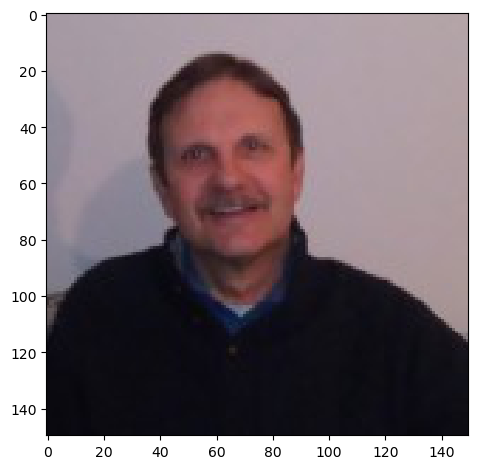

In [18]:
im2 = imread('E:\\rolan\\Pictures\\rad_picture2.jpg')
plt.figure()
imshow(im)
plt.show()

In [21]:
print_image_summary(im2, ['R', 'G','B'])

--------------
Image Details:
--------------
Image dimensions: (150, 150, 3)
Channels:
R : min=4.0000, max=189.0000
G : min=4.0000, max=166.0000
B : min=2.0000, max=175.0000


<div class="alert alert-block alert-success"><font color="black"><h1><left>Examine Pixels Intensity Scale Distribution</left></h1></font></div>

In [81]:
import numpy as np
result = [pixel[0] for line in im2 for pixel in line]
result = np.array(result)
norm_result = result/result.sum()
print(im2[0][0][0])
print(len(result), len(norm_result))      
#len(im2[0][0])

166
22500 22500


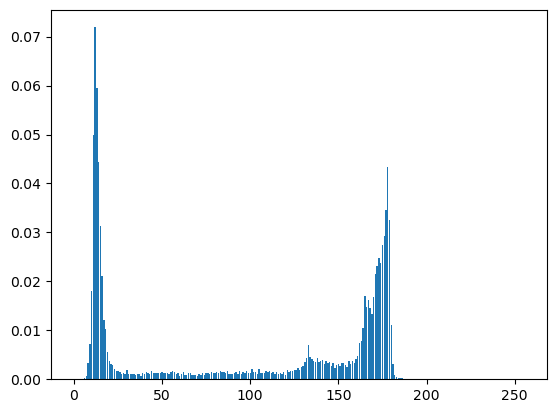

In [89]:
psums = [(result == v).sum() for v in range(256)]
psums = np.array(psums)
norm_psums = psums/psums.sum()
plt.figure()
plt.bar(range(256), norm_psums)
plt.show()

<div class="alert alert-block alert-success"><font color="black"><h1><left>Examine Pixels Intensity Cumulative Distribution</left></h1></font><br>
Distribution is limited to the middle of the scale, many missing intensities near end and beginning of scale
</div>

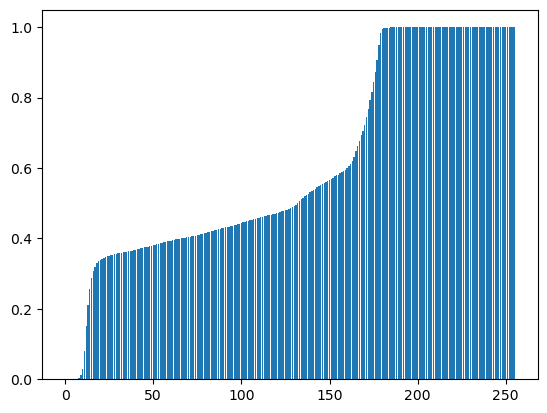

In [94]:
#Cumulative Histogram
cumul_h = np.zeros((256,))
for i in range(256):
    cumul_h[i] = norm_psums[i] + cumul_h[i-1]
plt.figure()
plt.bar(range(256), cumul_h)
plt.show()

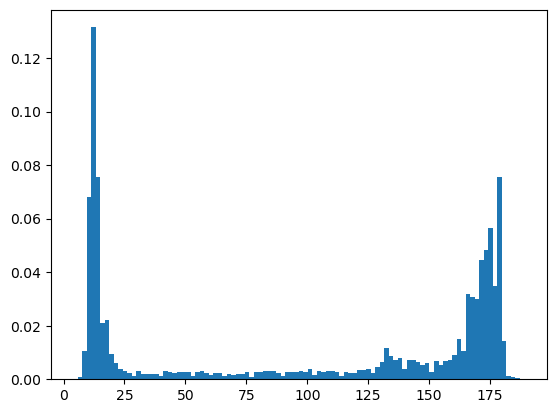

In [85]:
# h = [v.sum() for v in result]
plt.figure()
plt.hist(result,bins=100,weights=np.ones(len(norm_result)) / len(norm_result))
plt.show()
# len(h)
# im[1:20]
# result[0].count()
# import pandas as pd
# pd.Series(result).value_counts()

<div class="alert alert-block alert-success"><font color="black"><h1><left>Equalize Distribution</left></h1></font></div>

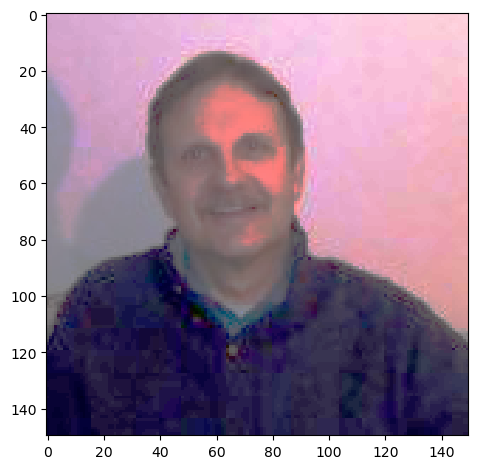

In [96]:
# Histogram Equalization
from skimage import exposure
img_eq = exposure.equalize_hist(im2)
plt.figure()
imshow(img_eq)
plt.show()


In [100]:
print_image_summary(img_eq, ['R', 'G','B'])

--------------
Image Details:
--------------
Image dimensions: (150, 150, 3)
Channels:
R : min=0.0001, max=1.0000
G : min=0.0001, max=0.8432
B : min=0.0000, max=0.9478


<div class="alert alert-block alert-success"><font color="black"><h1><left>Use an Adaptive Equalization</left></h1></font></div>

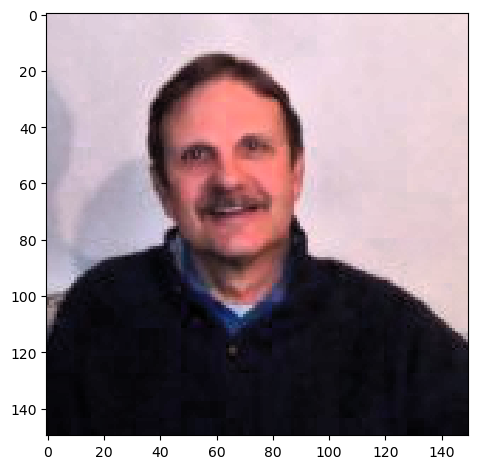

In [97]:
# Histogram Adaptive Equalization
from skimage import exposure
img_eq2 = exposure.equalize_adapthist(im2)
plt.figure()
imshow(img_eq2)
plt.show()


In [101]:
print_image_summary(img_eq2, ['R', 'G','B'])

--------------
Image Details:
--------------
Image dimensions: (150, 150, 3)
Channels:
R : min=0.0000, max=1.0000
G : min=0.0000, max=0.9056
B : min=0.0000, max=0.9508


<div class="alert alert-block alert-success"><font color="black"><h1><left>Rescale the Intensity</left></h1></font></div>

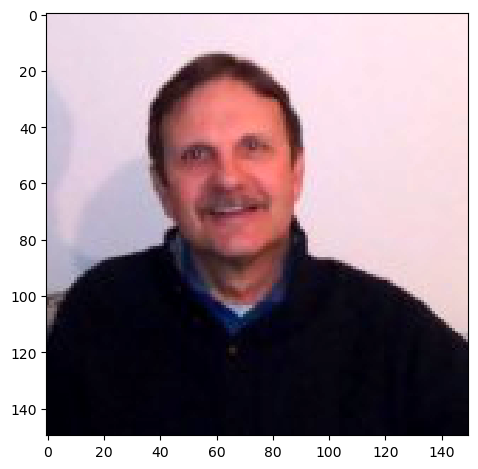

In [98]:
# Contrast Stretching
from skimage import exposure
p2, p98 = np.percentile(im2, (2,98))
img_rescale = exposure.rescale_intensity(im2, in_range=(p2, p98))
plt.figure()
imshow(img_rescale)
plt.show()


In [102]:
print_image_summary(img_rescale, ['R', 'G','B'])

--------------
Image Details:
--------------
Image dimensions: (150, 150, 3)
Channels:
R : min=0.0000, max=255.0000
G : min=0.0000, max=236.0000
B : min=0.0000, max=250.0000


<div class="alert alert-block alert-success"><font color="black"><h1><left>Results</left></h1></font>
    
    
- The rescaling distributed the intensity over the full range
- This has lightened the picture and produced the best result</div>

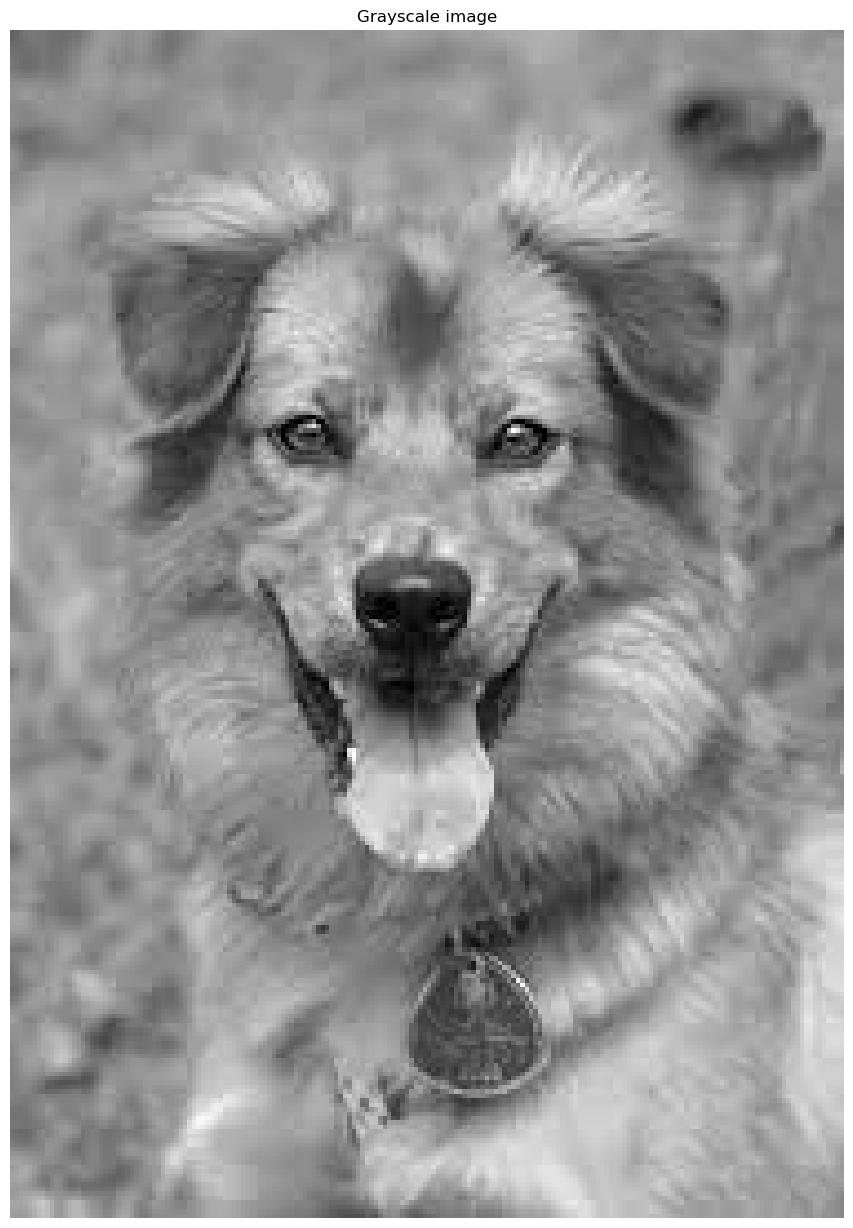

In [39]:
im3 = imread('E:\\rolan\\Pictures\\Gray-dog.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9, 16))
imshow(im3, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

# im2 = imread('E:\\rolan\\Pictures\\Gray-dog.jpg')
# plt.figure()
# imshow(im2)
# plt.show()

In [ ]:
2 + 2

In [6]:
image_gs[1:10]
#len(image_gs[0][0])
print_image_summary(im3, ['G'])

--------------
Image Details:
--------------
Image dimensions: (268, 188)
Channels:
G : min=0.0000, max=1.0000


In [41]:
im3_temp = im3 * 255.0
im3_temp[1:5]

array([[ 99., 103., 110., 116., 119., 120., 119., 118., 115., 113., 111.,
        110., 110., 113., 116., 118., 126., 132., 141., 150., 155., 156.,
        153., 151., 150., 145., 142., 143., 147., 149., 145., 141., 135.,
        130., 124., 118., 117., 120., 125., 128., 132., 135., 142., 148.,
        153., 155., 155., 155., 156., 156., 155., 154., 152., 151., 150.,
        149., 149., 148., 148., 147., 146., 146., 145., 145., 144., 144.,
        144., 143., 143., 143., 142., 142., 145., 145., 144., 143., 143.,
        142., 141., 141., 151., 151., 153., 155., 157., 160., 161., 162.,
        160., 159., 158., 157., 155., 154., 153., 152., 148., 149., 150.,
        153., 155., 157., 159., 160., 157., 158., 159., 161., 164., 166.,
        167., 168., 170., 170., 171., 172., 173., 174., 175., 176., 176.,
        176., 175., 174., 172., 171., 170., 169., 160., 158., 156., 152.,
        149., 145., 143., 141., 139., 142., 146., 150., 150., 148., 145.,
        143., 140., 142., 146., 150., 

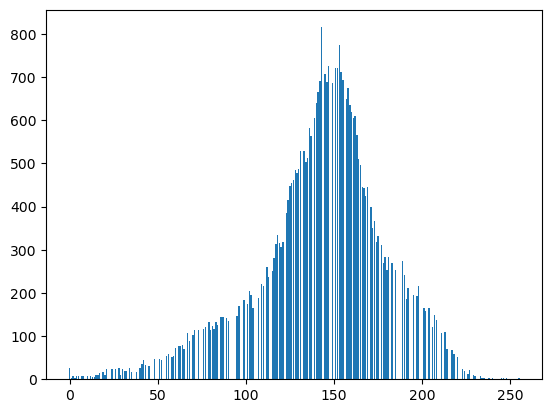

array([[ 99., 103., 110., ..., 144., 144., 144.],
       [102., 105., 110., ..., 152., 152., 152.],
       [106., 108., 110., ..., 155., 155., 155.],
       ...,
       [139., 138., 136., ..., 161., 165., 169.],
       [137., 136., 134., ..., 167., 172., 175.],
       [139., 137., 134., ..., 169., 173., 177.]])

In [44]:
im3_temp = im3 * 255.0
h = [(im3_temp == v).sum() for v in range(256)]
plt.figure()
plt.bar(range(256), h)
plt.show()
# len(h)
im3_temp[1:20]